In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.animation as animation

from torch.utils.data import Dataset
# import binvox
import os
import json
import trimesh
import skimage
import random
# from mesh_to_sdf import mesh_to_voxels, sample_sdf_near_surface, scale_to_unit_sphere
import mesh_to_sdf
import pyrender
import numpy as np
import matplotlib.pyplot as plt
import io
from deep_sdf import utils, metrics, plotting
import math
import pandas as pd
import pytorch3d
import torch

import os
os.environ['PYOPENGL_PLATFORM'] = 'egl'

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)

/home/wulff/anaconda3/envs/deep3dcomp/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
i/n

0.1

In [2]:

folder = "/mnt/hdd/ShapeNetCore.v2/02691156" # planes
folder = "/mnt/hdd/ShapeNetCore.v2/04256520"    # sofas
# folder = "/mnt/hdd/ShapeNetCore.v2/03636649"    # lamps



i = 0
n = 0
for fold in os.listdir(folder):
    p = os.path.join(folder, fold, "models/model_normalized.obj")
    mesh = trimesh.load(p)
    n += 1
    try:
        ret = mesh_to_sdf.mesh_to_voxels(mesh, voxel_resolution=128, check_result=True, pad=True, sign_method="depth")
        print("Success", p)
        i += 1
    except mesh_to_sdf.BadMeshException:
        pass
        # print("BadMeshException")

print("Total", i, " out of ", len(os.listdir(folder)))

# idxs_neg = np.argwhere(sdf < 1).reshape(-1)
# # idxs_neg = np.argwhere((-0.1 < sdf) & (sdf < 0.0)).reshape(-1)

# print(len(idxs_neg))

# anim = plotting.render_sdf_vid(points[idxs_neg], sdf[idxs_neg])
# plt.close()

# from IPython.display import HTML
# HTML(anim.to_jshtml())

KeyboardInterrupt: 

In [2]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

# df = pd.read_csv("examples/planes/Evaluation/2000/chamfer.csv", delimiter=";")
# df_line = pd.read_csv("../../shared/deepsdfcomp/searches/double_nonlinearity/line/Evaluation/2000/chamfer.csv", delimiter=";")
# df_plane = pd.read_csv("../../shared/deepsdfcomp/searches/double_nonlinearity/plane/Evaluation/2000/chamfer.csv", delimiter=";")
df_baseline = pd.read_csv("../../shared/deepsdfcomp/searches/double_nonlinearity/baseline/Evaluation/2000/chamfer.csv", delimiter=";")
df_siren = pd.read_csv("../../shared/deepsdfcomp/searches/double_nonlinearity/siren_new_schedule/Evaluation/2000/chamfer.csv", delimiter=";")
df_siren_128 = pd.read_csv("../../shared/deepsdfcomp/searches/double_nonlinearity/siren_width=128_no_bottleneck/Evaluation/2000/chamfer.csv", delimiter=";")
df_siren_64 = pd.read_csv("../../shared/deepsdfcomp/searches/double_nonlinearity/siren_width=64_no_bottleneck/Evaluation/2000/chamfer.csv", delimiter=";")
df_siren_256 = pd.read_csv("../../shared/deepsdfcomp/searches/double_nonlinearity/siren_width=256_no_bottleneck_v2/Evaluation/2000/chamfer.csv", delimiter=";")
df_voxelized = pd.read_csv("data/voxelize_until_cd_meshes_CD=0.001/run_voxelize_until_CD_logs.csv")

# fig, ax = plt.subplots(1, 3, figsize=(15, 5))
# titles = ["NL Combination: Line", "SIREN", "Baseline"]
# for i, df in enumerate([df1, df2, df_baseline]):
#     df.head()
#     print(df.mean())
#     print(df.median())
#     df.hist("chamfer_dist", bins=100, ax=ax[i])
#     ax[i].set_xlim((0, 0.010))
#     # ax[i].set_ylim((0, 350))
#     ax[i].set_title(titles[i])

In [4]:
df_siren["chamfer_dist"].mean()

0.00017863627278979764

In [19]:
print("baseline: ", df_baseline.mean(numeric_only=True), df_baseline.median(numeric_only=True), "\n")
print("siren: ", df_siren.mean(numeric_only=True), df_siren.median(numeric_only=True), "\n")
print("siren 256: ", df_siren_256.mean(numeric_only=True), df_siren_256.median(numeric_only=True), "\n")
# print("siren 128: ", df_siren_128.mean(numeric_only=True), df_siren_128.median(numeric_only=True), "\n")
print("siren 64: ", df_siren_64.mean(numeric_only=True), df_siren_64.median(numeric_only=True), "\n")

baseline:  chamfer_dist          0.000147
normal_consistency    0.020689
dtype: float64 chamfer_dist          0.000040
normal_consistency    0.021629
dtype: float64 

siren:  chamfer_dist          0.000179
normal_consistency    0.019108
dtype: float64 chamfer_dist          0.000032
normal_consistency    0.019626
dtype: float64 

siren 256:  chamfer_dist          0.000225
normal_consistency    0.020490
dtype: float64 chamfer_dist          0.000037
normal_consistency    0.020707
dtype: float64 

siren 64:  chamfer_dist          0.000296
normal_consistency    0.016108
dtype: float64 chamfer_dist          0.000072
normal_consistency    0.017378
dtype: float64 



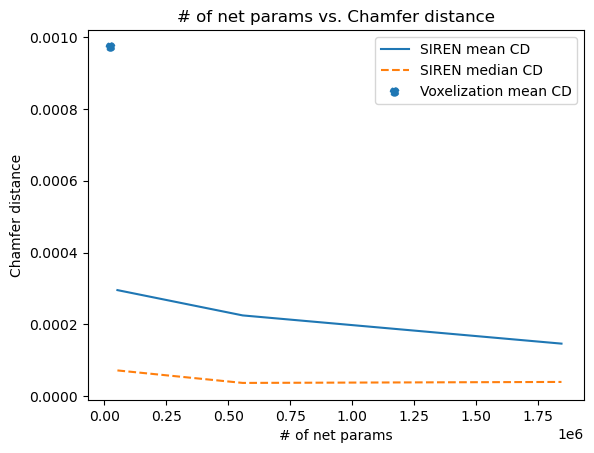

In [28]:
exps = [
    "../../shared/deepsdfcomp/searches/double_nonlinearity/siren_width=64_no_bottleneck",
    "../../shared/deepsdfcomp/searches/double_nonlinearity/siren_width=256_no_bottleneck_v2",
    ]
vox_logs = [
    pd.read_csv("data/voxelize_until_cd_meshes_CD=0.001/run_voxelize_until_CD_logs.csv"),
]
plotting.plot_capacity_vs_chamfer_dist(exps, type="latent", voxelization_logs=vox_logs)

In [29]:
len(df_voxelized)

138

In [7]:
df_voxelized.mean(numeric_only=True)

Unnamed: 0.1             68.500000
Unnamed: 0                0.000000
voxel_resolution        112.260870
gt_vertices           83911.528986
decimated_vertices     8289.065217
cd                        0.000973
iteration                 2.318841
dtype: float64

In [16]:
df_siren.sort_values("chamfer_dist", ascending=False).drop(columns=["all_chamfer_dist"])

,shape,chamfer_dist,normal_consistency
412,ShapeNetV2/02691156/fc16704314dc71ee9a6e43b878d5b335,8.756794e-03,0.012752
360,ShapeNetV2/02691156/f6e6fd724a9eab24ba8e93696257b3fc,5.344461e-03,0.016526
438,ShapeNetV2/02691156/fef1c15a5db21b00a67cc8f661e7890a,4.676031e-03,0.015771
153,ShapeNetV2/02691156/df25be12ae47d2517ef7776b3bf5815c,2.579081e-03,0.017206
390,ShapeNetV2/02691156/f9db62e6a88f0d7129343faf3bbffb15,2.484231e-03,0.010837
...,...,...,...
244,ShapeNetV2/02691156/e87902d01d40c71521b1ceea9c93aa79,1.015518e-05,0.017794
16,ShapeNetV2/02691156/d28a3cd771b2bf1e71d03b466c72ce41,9.532152e-06,0.015387
152,ShapeNetV2/02691156/df1c68e94259c6cf5c7319b71bdce6e,7.015172e-06,0.020189
154,ShapeNetV2/02691156/df411aa240fe48d5855eb7906a7a7a04,2.100116e-06,0.016054


In [ ]:
trimesh.load("/mnt/hdd/ShapeNetCore.v2/02691156/fef1c15a5db21b00a67cc8f661e7890a/models/model_normalized.obj").show()

In [56]:
[torch.Tensor(_) for _ in mesh.faces][0].shape

torch.Size([3])

In [4]:
from pytorch3d.structures import Meshes
from pytorch3d import structures, io, loss

filename = "/mnt/hdd/ShapeNetCore.v2/02691156/fef1c15a5db21b00a67cc8f661e7890a/models/model_normalized.obj"
mesh = utils.as_mesh(trimesh.load(filename))

# verts, faces = io.load_ply(filename)
# verts, faces, aux = io.load_obj(filename)
# meshes = Meshes(verts=[verts], faces=[faces.verts_idx])

meshes = trimesh_to_pytorch3d_meshes(mesh)
loss.mesh_normal_consistency(meshes)

tensor(0.7256)

In [13]:
filename = "../../shared/deepsdfcomp/searches/double_nonlinearity/baseline/Reconstructions/2000/Meshes/ShapeNetV2/02691156/d0456644386d9149ce593c35f70d3f.ply"
mesh = utils.as_mesh(trimesh.load(filename))
meshes = utils.trimesh_to_pytorch3d_meshes([mesh])
loss.mesh_normal_consistency(meshes)

tensor(0.0228)

In [11]:
meshes.faces_list()

[tensor([[    2,     1,     0],
         [    4,     3,     0],
         [    4,     0,     1],
         ...,
         [45684, 45682, 45683],
         [45684, 45683, 45685],
         [45685, 45683, 45680]]),
 tensor([[    2,     1,     0],
         [    4,     3,     0],
         [    4,     0,     1],
         ...,
         [45684, 45682, 45683],
         [45684, 45683, 45685],
         [45685, 45683, 45680]])]

In [64]:
filename = "../../shared/deepsdfcomp/searches/double_nonlinearity/siren_new_schedule/Reconstructions/2000/Meshes/ShapeNetV2/02691156/d0456644386d9149ce593c35f70d3f.ply"
mesh = utils.as_mesh(trimesh.load(filename))
meshes = trimesh_to_pytorch3d_meshes(mesh)
loss.mesh_normal_consistency(meshes)

tensor(0.0197)

In [21]:
torch.Tensor(np.array(mesh.faces)).size(2)

IndexError: Dimension out of range (expected to be in range of [-2, 1], but got 2)

In [ ]:
experiment_dirs = [
    "../../shared/deepsdfcomp/searches/double_nonlinearity/baseline",
    # "../../shared/deepsdfcomp/searches/double_nonlinearity/all_latentsize=200_width=256_lr=5e-4_int=150",
    "../../shared/deepsdfcomp/searches/double_nonlinearity/line",
    "../../shared/deepsdfcomp/searches/double_nonlinearity/plane",
    "../../shared/deepsdfcomp/searches/double_nonlinearity/siren_new_schedule",
]

shape_ids = [
    "fc16704314dc71ee9a6e43b878d5b335",
    "f6e6fd724a9eab24ba8e93696257b3fc",  
    "fef1c15a5db21b00a67cc8f661e7890a",
    "df25be12ae47d2517ef7776b3bf5815c",
    "f9db62e6a88f0d7129343faf3bbffb15",
]

plotting.plot_reconstruction_comparison(experiment_dirs, shape_ids)